# 0.0 Business Problem

## *****Estágio atual do projeto:*****
Ciclo 4: Criar as hipóteses de negócio

## 0.1 Contexto:
A TopBank é uma grande empresa de serviços bancários. Ela atua principalmente nos países da Europa oferecendo produtos financeiros, desde contas bancárias até investimentos, passando por alguns tipos de seguros e produto de investimento.

O modelo de negócio da empresa é do tipo serviço, ou seja, ela comercializa serviços bancários para seus clientes através de agências físicas e um portal online. 

O principal produto da empresa é uma conta bancária, na qual o cliente pode depositar seu salário, fazer saques, depósitos e transferência para outras contas. Essa conta bancária não tem custo para o cliente e tem uma vigência de 12 meses, ou seja, o cliente precisa renovar o contrato dessa conta para continuar utilizando pelos próximos 12 meses.

Segundo o time de Analytics da TopBank, cada cliente que possui essa conta bancária retorna um valor monetário de 15% do valor do seu salário estimado, se esse for menor que a média e 20% se esse salário for maior que a média, durante o período vigente de sua conta. Esse valor é calculado anualmente. 

Por exemplo, se o salário mensal de um cliente é de 1.000 reais e a média de todos os salários do banco é de 800 reais. A empresa, portanto, fatura 200 reais anualmente com esse cliente. Se esse cliente está no banco há 10 anos, a empresa já faturou 2.000 reais com suas transações e utilização da conta. 

Nos últimos meses, o time de Analytics percebeu que a taxa de clientes cancelando suas contas e deixando o banco, atingiu números inéditos na empresa. Preocupados com o aumento dessa taxa, o time planejou um plano de ação para diminuir taxa de evasão de clientes.

Preocupados com a queda dessa métrica, o time de Analytics da TopBottom, contratou você como consultor de Data Science para criar um plano de ação, com o objetivo de reduzir a evasão de clientes, ou seja, impedir que o cliente cancele seu contrato e não o renove por mais 12 meses. Essa evasão, nas métricas de negócio, é conhecida como Churn.

De maneira geral, Churn é uma métrica que indica o número de clientes que cancelaram o contrato ou pararam de comprar seu produto em um determinado período de tempo. Por exemplo, clientes que cancelaram o contrato de serviço ou após o vencimento do mesmo, não renovaram, são clientes considerados em churn.

Outro exemplo seria os clientes que não fazem uma compra à mais de 60 dias. Esse clientes podem ser considerados clientes em churn até que uma compra seja realizada. O período de 60 dias é totalmente arbitrário e varia entre empresas. 

Projeto retirado do Blog Seja Um Data Scientist
https://sejaumdatascientist.com/predicao-de-churn/

Projeto original disponível na plataforma Kaggle
https://www.kaggle.com/mervetorkan/churndataset

## 0.2 Estratégia da Solução:

#### 0.2.1 Objetivos:
1. Qual a taxa atual de Churn da Top-Bank? Como ela varia mensalmente?
2. Qual a performance do modelo em classificar os clientes como churn?
3. Qual o retorno esperado, em termos de faturamento, se a empresa utilizar seu modelo para evitar o churn dos clientes?

#### 0.2.2 Proposta de Solução:
1. Definir a baseline de churn atual e qual é seu custo para a empresa, e utilizar de Exploratory Data Analysis para levantar parâmetros de timeseries para explicar o comportamento da variabilidade ao longo do tempo.
2. Escolher métrica de performance, modelar o problema e treinar.
3. Definido a baseline (problema 1), scorar os clientes, suas probabilidades de churn, definir programa de giftcards, mensurar probabilidade de conversão de clientes em churn, e custo do programa. Retorno financeiro = Churn atual - (menos) Churn predito após programa de giftcards - (menos) custo do programa.

#### 0.2.3 Inputs:
1. Problema de negócio
2. Conjunto de dados com características de 10.000 clientes e seus status de churn

#### 0.2.4 Outputs:
1. Taxas e parâmetros em uma tabela no notebook (Porcentagem, | Mês | Taxa de churn |)
3. Métricas do modelo (Métrica F1-Score)
3. Receita gerada pela redução de churn (Valor em moeda)
4. Tabela de banco de dados SQL com todas as classificações
5. API com request/predict do tipo: | v1 | v2 | v3 | - 1/0

#### 0.2.5 Ciclos:
1. Pipeline de dados, funcional, de ponta a ponta (desde a coleta de dados até o 
    treinamento do modelo)
2. Entender os dados e limpa-los (buscar inconsistências) Análises de estatística
    descritiva de primeira ordem
3. Feature Engineering (criar variáveis que modelam o fenômeno)
4. Criar as hipóteses de negócio
5. Análise exploratória de dados para validar ou refutar hióteses
6. Definir métricas e treinar o modelo
7. Analisar métricas
8. Resultados e conclusão

## 0.3 Significado das features:

1. RowNumber: O número da coluna
2. CustomerID: Identificador único do cliente
3. Surname: Sobrenome do cliente.
4. CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.
5. Geography: O país onde o cliente reside.
6. Gender: O gênero do cliente.
7. Age: A idade do cliente.
8. Tenure: Número de anos que o cliente permaneceu ativo.
9. Balance: Valor monetário que o cliente tem em sua conta bancária.
10. NumOfProducts: O número de produtos comprado pelo cliente no banco.
11. HasCrCard: Indica se o cliente possui ou não cartão de crédito.
12. IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.
13. EstimateSalary: Estimativa do salário mensal do cliente.
14. Exited: Indica se o cliente está ou não em Churn.

## 0.4 Sumário:

## 0.5 Resultados e Conclusão:

# 1.0 Imports

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import shapiro, ttest_ind

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from xgboost import XGBRFClassifier

import time

In [80]:
# reading csv
df = pd.read_csv('C:\\Users\\Notebook\\Google Drive\\Pessoal\\Projetos\\bank_churn_predict\\churn.csv')

In [149]:
# Help Functions

# Estatística descritiva de primeira ordem
def estat_desc(x):
    print(f'Média: {round(x.mean(), 2)}')
    print(f'Mínimo: {round(x.min(), 2)}')
    print(f'Máximo: {round(x.max(), 2)}')
    print(f'Range: {round(x.max()-x.min(), 2)}')
    print(f'Desvio Padrão: {round(x.std(), 2)}')
    print(f'Curtose: {round(x.kurtosis(), 2)}')
    print(f'Skew: {round(x.skew(), 2)}')
    
# Teste de Shapiro de normalidade
def teste_shapiro(x, alpha=0.05):
    temp = np.random.choice(df.index, 5000)
    x = x.loc[temp]
    result = shapiro(x)
    if result.pvalue < alpha:
        print(f'Com um pvalor: {result.pvalue}, a Series NÃO tem distribuição normal.')
    else:
        print(f'Com um pvalor: {result.pvalue}, a Series tem distribuição normal.')

# identificando outliers
def busca_outliers(df, series):
    q1 = np.percentile(df[series], 25)
    q3 = np.percentile(df[series], 75)
    distancia = q3 - q1
    salto = distancia * 1.5
    li = q1 - salto
    ls = q3 + salto
    indices = df[(df[series]<li)|(df[series]>ls)].index
    print(f'O limite inferior é: {li}\nO limite superior é: {ls}\nHá {len(indices)} outliers')
    return indices

# Função inferência
def comparar_features(series1, series2, confiança, qtd_amostras):
    print('Series 1')
    print(f'Média = {round(series1.mean(), 2)}')
    print(f'Desvio padrão = {round(series1.std(), 2)}')
    print()
    print('Series 2')
    print(f'Média = {round(series2.mean(), 2)}')
    print(f'Desvio padrão = {round(series2.std(), 2)}')
    aleatório1 = np.random.choice(series1.dropna(), qtd_amostras)
    aleatório2 = np.random.choice(series2.dropna(), qtd_amostras)
    stat, p = ttest_ind(aleatório1, aleatório2)
    print(f'statistic = {round(stat, 2)}, p = {round(p, 2)}')
  
    if p < confiança:
        print(f'\nCom um p-valor igual à {round(p, 2)}, as series são estatísticamente DIFERENTES com um grau de confiança de {round(100-confiança*100)}%')
    if p > confiança:
        print(f'\nCom um p-valor igual à {round(p, 2)}, as series são estatísticamente IGUAIS com um grau de confiança de {round(100-confiança*100)}%')

# 2.0 General Analysis and Data Cleaning

## General Analysis

In [82]:
tempo_agora = time.time()

In [83]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
df['Exited'].mean()

0.2037

A feature target é desbalanceada, com 20% de churn.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [86]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [87]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [88]:
# Encondings
df['Geography_enc'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender_enc'] = LabelEncoder().fit_transform(df['Gender'])

## Features Analysis

### Exited

#### Principais Insights:
1. Dados desbalanceados
2. Correlações fracas ou muito fracas

#### General Analysis

In [89]:
df.corr()['Exited'].sort_values(ascending=False)[1:]

Age                0.285323
Balance            0.118533
Geography_enc      0.035943
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender_enc        -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

Correlação fraca com Age

In [90]:
df['Exited'].mean()

0.2037

Target desbalanceada, serão necessárias ferramentas de balanceamento e métricas para dados desbalanceados

### Age

#### Principais Insights:
1. Média de idade de clientes em churn é de 45, já os em não churn é de 37

#### General Analysis

In [91]:
df.corr()['Age'].sort_values(ascending=False)[1:]

Exited             0.285323
IsActiveMember     0.085472
Balance            0.028308
Geography_enc      0.022812
CustomerId         0.009497
RowNumber          0.000783
CreditScore       -0.003965
EstimatedSalary   -0.007201
Tenure            -0.009997
HasCrCard         -0.011721
Gender_enc        -0.027544
NumOfProducts     -0.030680
Name: Age, dtype: float64

Correlação fraca com Exited

<AxesSubplot:xlabel='Age', ylabel='Count'>

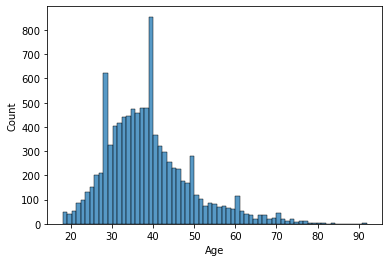

In [92]:
sns.histplot(df['Age'])

In [93]:
estat_desc(df['Age'])

Média: 38.92
Mínimo: 18
Máximo: 92
Range: 74
Desvio Padrão: 10.49
Curtose: 1.4
Skew: 1.01


In [94]:
teste_shapiro(df['Age'], 0.05)

Com um pvalor: 8.56718848626585e-39, a Series NÃO tem distribuição normal.


In [95]:
indices = busca_outliers(df, 'Age')

O limite inferior é: 14.0
O limite superior é: 62.0
Há 359 outliers


#### Correlação com a target

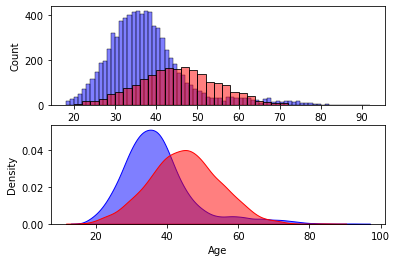

In [96]:
plt.subplot(2, 1, 1)
g = sns.histplot(df.loc[df['Exited']==0, 'Age'], color='b', alpha=0.5)
g = sns.histplot(df.loc[df['Exited']==1, 'Age'], color='r', alpha=0.5)
plt.subplot(2, 1, 2)
g = sns.kdeplot(df.loc[df['Exited']==0, 'Age'], color='b', alpha=0.5, shade=True)
g = sns.kdeplot(df.loc[df['Exited']==1, 'Age'], color='r', alpha=0.5, shade=True)

Aparentemente a média de idade de clientes que não estão em churn é por volta dos 37 anos, e os clientes em churn por volta de 45 anos.

In [97]:
print(f'Média de idade de clientes em NÃO churn: {round(df.loc[df["Exited"]==0, "Age"].mean())}')
print(f'Média de idade de clientes em churn: {round(df.loc[df["Exited"]==1, "Age"].mean())}')

Média de idade de clientes em NÃO churn: 37
Média de idade de clientes em churn: 45


### Balance

#### Principais Insights:
1. Clientes com saldo zerado na conta tem probabilidade relativamente menor de churn

#### General Analysis

In [98]:
df.corr()['Balance'].sort_values(ascending=False)[1:]

Exited             0.118533
Geography_enc      0.069408
Age                0.028308
EstimatedSalary    0.012797
Gender_enc         0.012087
CreditScore        0.006268
RowNumber         -0.009067
IsActiveMember    -0.010084
Tenure            -0.012254
CustomerId        -0.012419
HasCrCard         -0.014858
NumOfProducts     -0.304180
Name: Balance, dtype: float64

Correlação fraca com NumOfProducts

In [99]:
estat_desc(df['Balance'])

Média: 76485.89
Mínimo: 0.0
Máximo: 250898.09
Range: 250898.09
Desvio Padrão: 62397.41
Curtose: -1.49
Skew: -0.14


<AxesSubplot:xlabel='Balance', ylabel='Count'>

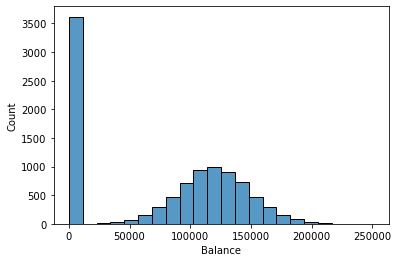

In [100]:
sns.histplot(df['Balance'])

In [101]:
df['Balance'].value_counts(normalize=True).head(5)

0.00         0.3617
105473.74    0.0002
130170.82    0.0002
72594.00     0.0001
139723.90    0.0001
Name: Balance, dtype: float64

36% das contas bancárias estão zeradas

In [102]:
teste_shapiro(df['Balance'])

Com um pvalor: 0.0, a Series NÃO tem distribuição normal.


In [103]:
indices = busca_outliers(df, 'Balance')

O limite inferior é: -191466.36000000002
O limite superior é: 319110.60000000003
Há 0 outliers


#### Correlação com a target

<AxesSubplot:xlabel='Balance', ylabel='Density'>

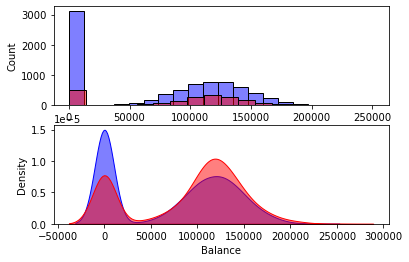

In [104]:
plt.subplot(2, 1, 1)
sns.histplot(df.loc[df['Exited']==0, 'Balance'], color='b', alpha=0.5)
sns.histplot(df.loc[df['Exited']==1, 'Balance'], color='r', alpha=0.5)
plt.subplot(2, 1, 2)
sns.kdeplot(df.loc[df['Exited']==0, 'Balance'], color='b', alpha=0.5, shade=True)
sns.kdeplot(df.loc[df['Exited']==1, 'Balance'], color='r', alpha=0.5, shade=True)

Aparentemente os clientes que têm algum dinheiro na sua conta bancária tem uma probabilidade relativamente maior de churn

### Geography

#### Principais Insights:
1. Clientes da Germany têm maior probabilidade de Churn

#### General Analysis

In [105]:
df.corr()['Geography_enc'].sort_values(ascending=False)[1:]

Balance            0.069408
Exited             0.035943
Age                0.022812
CreditScore        0.007888
IsActiveMember     0.006724
CustomerId         0.006516
Gender_enc         0.004719
NumOfProducts      0.003972
Tenure             0.003739
EstimatedSalary   -0.001369
HasCrCard         -0.008523
RowNumber         -0.010358
Name: Geography_enc, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='Geography_enc', ylabel='count'>

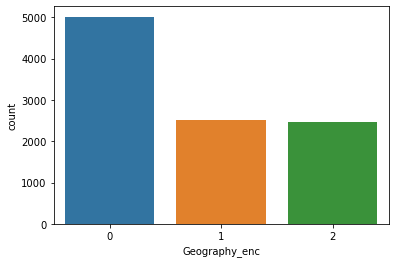

In [106]:
sns.countplot(x='Geography_enc', data=df)

#### Correlação com a target

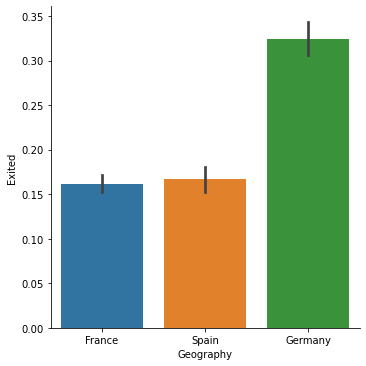

In [107]:
sns.catplot(x='Geography', y='Exited', data=df, kind='bar')

Clientes da Germany têm maior probabilidade de Churn

### CreditScore

#### Principais Insights:
1. Aparentemente não ajuda a modelar o fenômeno

#### General Analysis

In [108]:
df.corr()['CreditScore'].sort_values(ascending=False)[1:]

IsActiveMember     0.025651
NumOfProducts      0.012238
Geography_enc      0.007888
Balance            0.006268
RowNumber          0.005840
CustomerId         0.005308
Tenure             0.000842
EstimatedSalary   -0.001384
Gender_enc        -0.002857
Age               -0.003965
HasCrCard         -0.005458
Exited            -0.027094
Name: CreditScore, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

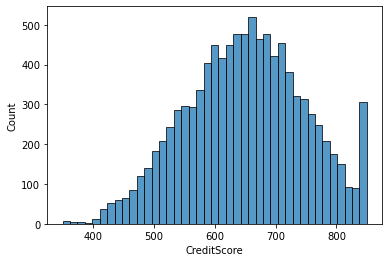

In [109]:
sns.histplot(df['CreditScore'])

Há um teto máximo de score

In [110]:
estat_desc(df['CreditScore'])

Média: 650.53
Mínimo: 350
Máximo: 850
Range: 500
Desvio Padrão: 96.65
Curtose: -0.43
Skew: -0.07


In [111]:
indices = busca_outliers(df, 'CreditScore')

O limite inferior é: 383.0
O limite superior é: 919.0
Há 15 outliers


Outliers somente no início da distribuição

In [112]:
teste_shapiro(df['CreditScore'])

Com um pvalor: 4.655843226008876e-15, a Series NÃO tem distribuição normal.


#### Correlação com a target

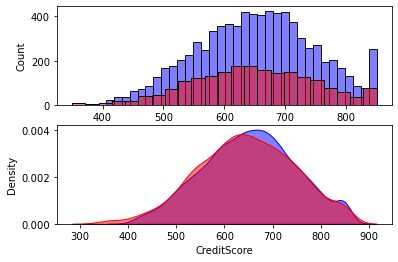

In [113]:
plt.subplot(2, 1, 1)
g = sns.histplot(df.loc[df['Exited']==0, 'CreditScore'], alpha=0.5, color='b')
g = sns.histplot(df.loc[df['Exited']==1, 'CreditScore'], alpha=0.5, color='r')
plt.subplot(2, 1, 2)
g = sns.kdeplot(df.loc[df['Exited']==0, 'CreditScore'], alpha=0.5, color='b', shade=True)
g = sns.kdeplot(df.loc[df['Exited']==1, 'CreditScore'], alpha=0.5, color='r', shade=True)

Aparentemente não há faixas de CreditScore mais suscetíveis ao churn

### Tenure

#### Principais Insights:
1. Aparentemente não ajuda a modelar o fenômeno

#### General Analysis

In [114]:
df.corr()['Tenure'].sort_values(ascending=False)[1:]

HasCrCard          0.022583
Gender_enc         0.014733
NumOfProducts      0.013444
EstimatedSalary    0.007784
Geography_enc      0.003739
CreditScore        0.000842
RowNumber         -0.006495
Age               -0.009997
Balance           -0.012254
Exited            -0.014001
CustomerId        -0.014883
IsActiveMember    -0.028362
Name: Tenure, dtype: float64

Correlações muito fracas

In [115]:
df['Tenure'].max()

10

<AxesSubplot:xlabel='Tenure', ylabel='count'>

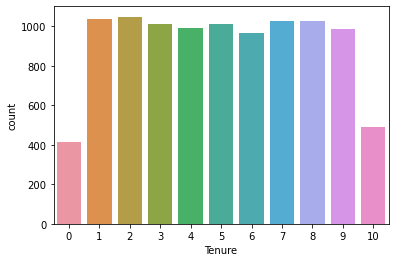

In [116]:
sns.countplot(x='Tenure', data=df)

In [117]:
df['Tenure'].value_counts(normalize=True)

2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: Tenure, dtype: float64

#### Correlação com a target

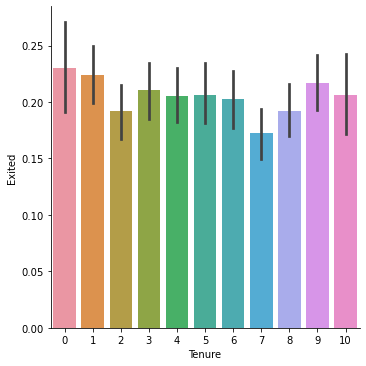

In [118]:
sns.catplot(x='Tenure', y='Exited', data=df, kind='bar')

Apesar das médias serem relativamente diferentes, os desvios padrões colocam todas as categorias em um mesmo patamar

### NumOfProducts

#### Principais Insights:
1. Clientes com 3 ou 4 produtos têm maior probabilidade de churn

#### General Analysis

In [119]:
df.corr()['NumOfProducts'].sort_values(ascending=False)[1:]

CustomerId         0.016972
EstimatedSalary    0.014204
Tenure             0.013444
CreditScore        0.012238
IsActiveMember     0.009612
RowNumber          0.007246
Geography_enc      0.003972
HasCrCard          0.003183
Gender_enc        -0.021859
Age               -0.030680
Exited            -0.047820
Balance           -0.304180
Name: NumOfProducts, dtype: float64

Correlação fraca negativa com Balance

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

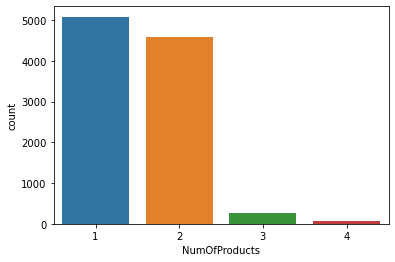

In [120]:
sns.countplot(x='NumOfProducts', data=df)

In [121]:
df['NumOfProducts'].value_counts(normalize=True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

95% dos clientes possuem 1 ou 2 produtos

#### Correlação com a target

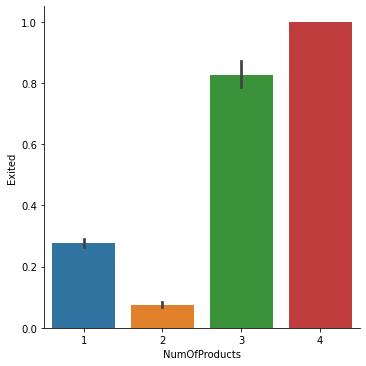

In [122]:
sns.catplot(x='NumOfProducts', y='Exited', data=df, kind='bar')

Clientes com 3 ou 4 produtos tem maior probabilidade de churn

### HasCrCard

#### Principais Insights:
1. Aparentemente não ajuda a modelar o fenômeno

#### General Analysis

In [123]:
df.corr()['HasCrCard'].sort_values(ascending=False)[1:]

Tenure             0.022583
Gender_enc         0.005766
NumOfProducts      0.003183
RowNumber          0.000599
CreditScore       -0.005458
Exited            -0.007138
Geography_enc     -0.008523
EstimatedSalary   -0.009933
Age               -0.011721
IsActiveMember    -0.011866
CustomerId        -0.014025
Balance           -0.014858
Name: HasCrCard, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

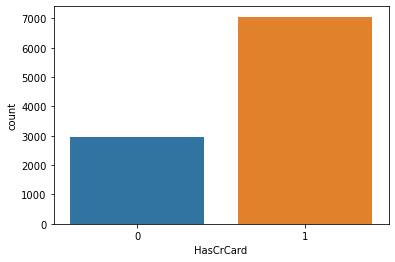

In [124]:
sns.countplot(x='HasCrCard', data=df)

In [125]:
df['HasCrCard'].value_counts(normalize=True)

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

#### Correlação com a target

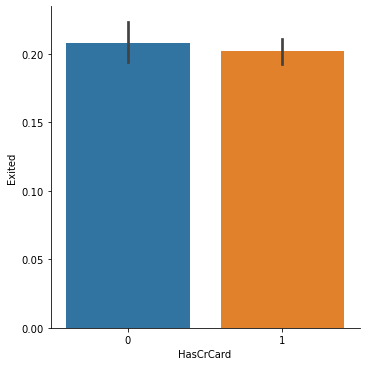

In [126]:
sns.catplot(x='HasCrCard', y='Exited', data=df, kind='bar')

Iguais

### IsActiveMember

#### Principais Insights:
1. Membros ativos são menos propensos ao churn

#### General Analysis

In [127]:
df.corr()['IsActiveMember'].sort_values(ascending=False)[1:]

Age                0.085472
CreditScore        0.025651
Gender_enc         0.022544
RowNumber          0.012044
NumOfProducts      0.009612
Geography_enc      0.006724
CustomerId         0.001665
Balance           -0.010084
EstimatedSalary   -0.011421
HasCrCard         -0.011866
Tenure            -0.028362
Exited            -0.156128
Name: IsActiveMember, dtype: float64

Correlações muito fracas

#### Correlação com a target

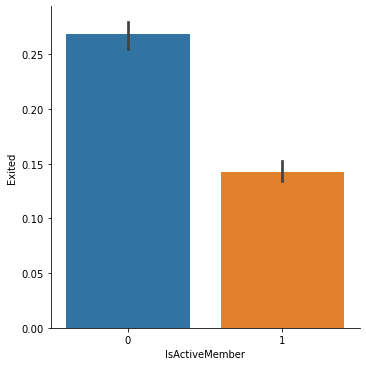

In [128]:
sns.catplot(x='IsActiveMember', y='Exited', data=df, kind='bar')

Diferença significativa

### EstimatedSalary

#### Principais Insights:
1. Aparentemente não ajuda a modelar o fenômeno

#### General Analysis

In [129]:
df.corr()['EstimatedSalary'].sort_values(ascending=False)[1:]

CustomerId        0.015271
NumOfProducts     0.014204
Balance           0.012797
Exited            0.012097
Tenure            0.007784
Geography_enc    -0.001369
CreditScore      -0.001384
RowNumber        -0.005988
Age              -0.007201
Gender_enc       -0.008112
HasCrCard        -0.009933
IsActiveMember   -0.011421
Name: EstimatedSalary, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

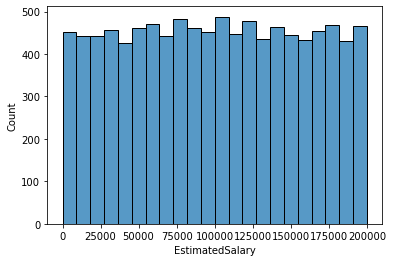

In [130]:
sns.histplot(df['EstimatedSalary'])

Inesperado, a distribuição esperada era uma Gaussiana ou algo parecido

#### Correlação com a target

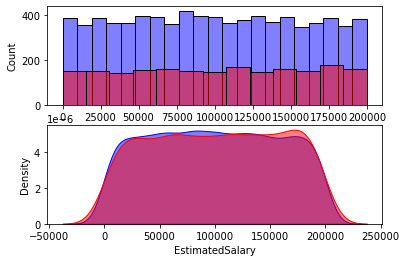

In [131]:
plt.subplot(2, 1, 1)
g = sns.histplot(df.loc[df['Exited']==0, 'EstimatedSalary'], color='b', alpha=0.5)
g = sns.histplot(df.loc[df['Exited']==1, 'EstimatedSalary'], color='r', alpha=0.5)
plt.subplot(2, 1, 2)
g = sns.kdeplot(df.loc[df['Exited']==0, 'EstimatedSalary'], color='b', alpha=0.5, shade=True)
g = sns.kdeplot(df.loc[df['Exited']==1, 'EstimatedSalary'], color='r', alpha=0.5, shade=True)

Não parece ajudar a modelar o fenômeno

### Gender

#### Principais Insights:
1. Mulheres tem maior probabilidade de churn

#### General Analysis

In [132]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_enc',
       'Gender_enc'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

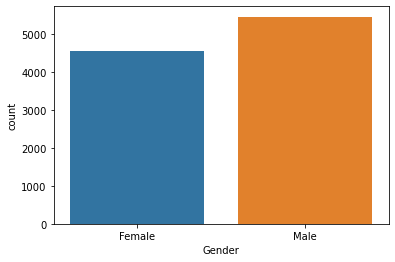

In [133]:
sns.countplot(x='Gender', data=df)

Equilibrada

#### Correlação com a target

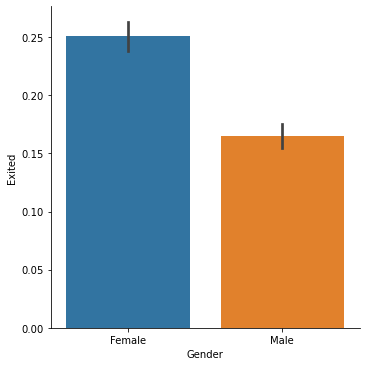

In [134]:
sns.catplot(x='Gender', y='Exited', data=df, kind='bar')

# 3.0 Feature Engineering

## Age Transformada por Log

In [135]:
df['Log_Age'] = df['Age'].apply(lambda x: np.log(x) if x>0 else 0)

<AxesSubplot:xlabel='Log_Age', ylabel='Count'>

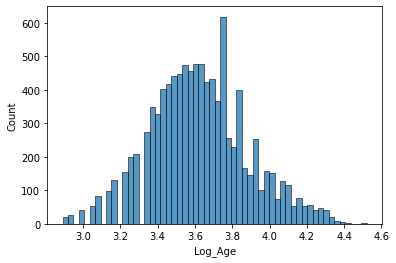

In [136]:
sns.histplot(df['Log_Age'])

In [137]:
teste_shapiro(df['Log_Age'], 0.05)

Com um pvalor: 1.0614654988305716e-11, a Series NÃO tem distribuição normal.


In [138]:
estat_desc(df['Log_Age'])

Média: 3.63
Mínimo: 2.89
Máximo: 4.52
Range: 1.63
Desvio Padrão: 0.26
Curtose: 0.15
Skew: 0.18


In [139]:
indices = busca_outliers(df, 'Log_Age')

O limite inferior é: 2.988055306121925
O limite superior é: 4.261870230596063
Há 182 outliers


## Média de churn por categoria de Tenure

In [140]:
temp = df.groupby('Tenure').mean()['Exited']
df['Tenure_Exited_Mean'] = df['Tenure'].map(temp)

In [141]:
df[['Tenure_Exited_Mean', 'Exited']].corr()

,Tenure_Exited_Mean,Exited
Tenure_Exited_Mean,1.000000,0.037283
Exited,0.037283,1.000000


Aparentemente não ajuda a modelar o evento

# 4.0 Business Hypothesis

## 4.1 A média de idade entre os clientes em churn e não churn são diferentes com um grau de confiança de 95%

In [153]:
a = df.loc[df['Exited']==0, 'Age']
b = df.loc[df['Exited']==1, 'Age']

In [165]:
comparar_features(a, b, 0.05, 500)

Series 1
Média = 37.41
Desvio padrão = 10.13

Series 2
Média = 44.84
Desvio padrão = 9.76
statistic = -13.18, p = 0.0

Com um p-valor igual à 0.0, as series são estatísticamente DIFERENTES com um grau de confiança de 95%


In [169]:
a = np.random.choice(df.loc[df['Exited']==0, 'Age'].values, 500)
b = np.random.choice(df.loc[df['Exited']==1, 'Age'].values, 500)

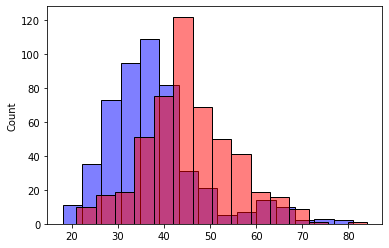

In [177]:
g = sns.histplot(a, color='b', alpha=0.5, bins=15)
g = sns.histplot(b, color='r', alpha=0.5, bins=15)

## 4.2 Clientes com saldo bancário igual a zero, têm mais probabilidade de renovar o contrato de serviço.

## 4.3 90% dos clientes com saldo bancário igual a zero, possuem até 2 produtos bancários.

# 5.0 Exploratory Data Analysis

# 6.0 Machine Learning Model

## 6.1 Preparing

In [64]:
backup = df.copy()

In [65]:
df = backup.copy()

In [66]:
# Encodings
temp = pd.get_dummies(df['Geography_enc'], prefix='Geography', drop_first=True)
df = pd.concat([df, temp], axis=1)

# Removing features
features_remover = 'CustomerId Surname Geography Gender Geography_enc RowNumber Age Tenure'.split()
df.drop(features_remover, axis=1, inplace=True)

# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Standard and scaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler = pd.DataFrame(X_scaler, columns = X.columns)

# Hiding test
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=101)

# Train and validation
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

In [67]:
# Solving unbalance
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train_, y_train_)
X_smote = pd.DataFrame(X_smote, columns=X.columns)

# near = NearMiss()
# X_near, y_near = near.fit_resample(X_train_, y_train_)
# X_near = pd.DataFrame(X_near, columns=X.columns)

## 6.2 Models

### Xgbrfboost

In [68]:
# Modeling
xgbrf_model = XGBRFClassifier(use_label_encoder=False)
xgbrf_model_fit = xgbrf_model.fit(X_smote, y_smote, eval_metric='error')
xgbrf_predict = xgbrf_model_fit.predict(X_valid)

#### Metrics

In [69]:
print(classification_report(y_valid, xgbrf_predict))
print(roc_auc_score(y_valid, xgbrf_predict))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1923
           1       0.52      0.71      0.60       477

    accuracy                           0.81      2400
   macro avg       0.72      0.77      0.74      2400
weighted avg       0.84      0.81      0.82      2400

0.7734262829632682


#### Importances

In [70]:
ranking = pd.DataFrame()
ranking['features'] = X.columns.to_list()
ranking['xgbrf_importances'] = xgbrf_model.feature_importances_
ranking[['features', 'xgbrf_importances']].sort_values('xgbrf_importances', ascending=False)

,features,xgbrf_importances
2,NumOfProducts,0.365693
7,Log_Age,0.243357
4,IsActiveMember,0.158116
9,Geography_1,0.080148
1,Balance,0.054502
10,Geography_2,0.028099
6,Gender_enc,0.025988
8,Tenure_Exited_Mean,0.020381
5,EstimatedSalary,0.010143
0,CreditScore,0.009698


### Random Forest

In [71]:
rf_model = RandomForestClassifier()
rf_model_fit = rf_model.fit(X_smote, y_smote)
rf_predict = rf_model_fit.predict(X_valid)

#### Metrics

In [72]:
print(classification_report(y_valid, rf_predict))
print(roc_auc_score(y_valid, rf_predict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1923
           1       0.60      0.57      0.59       477

    accuracy                           0.84      2400
   macro avg       0.75      0.74      0.74      2400
weighted avg       0.84      0.84      0.84      2400

0.7380452450802435


#### Importances

In [73]:
ranking['rf_importances'] = rf_model_fit.feature_importances_

In [74]:
ranking[['features', 'rf_importances']].sort_values('rf_importances', ascending=False)

,features,rf_importances
7,Log_Age,0.269041
2,NumOfProducts,0.160378
1,Balance,0.125588
5,EstimatedSalary,0.107833
0,CreditScore,0.104669
8,Tenure_Exited_Mean,0.101942
4,IsActiveMember,0.045099
6,Gender_enc,0.027285
9,Geography_1,0.025171
3,HasCrCard,0.017198


# 7.0 Results and Conclusions

# Time

In [75]:
print(f'O tempo de processamento do projeto foi de: {int(round(time.time()-tempo_agora, 2)/60)} minutos')

O tempo de processamento do projeto foi de: 0 minutos


# Continua...